In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

# Load test set
df_test = pd.read_csv('test.csv')

# Extract target from training set
df_target = df_train.Survived

# Combine target and test set for joint pre-processing
df_full = df_train.append(df_test, ignore_index=True)

In [3]:
df_target


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
df_train['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [5]:
# Extract relevant features for training the decision tree regressor
X_fare = df_full[['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']]
y_fare = df_full['Fare']

# One-hot-encode categorical features
X_fare = pd.get_dummies(X_fare, columns=['Sex', 'Embarked'], drop_first=True)

# Mask for defined Fare values in dataset 
fare_defined = ~df_full.Fare.isnull()

# Train the decision tree regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_fare[fare_defined], y_fare[fare_defined])

# Predict and fill missing Fare values
df_full.loc[~fare_defined, 'Fare'] = dtr.predict(X_fare[~fare_defined])

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
child = 14 
df_full['Minor'] = df_full.loc[df_full.Pclass < 3, 'Age'] < child

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Minor          600 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [9]:
def surname(name): 
    '''Extracts surname from name.'''
    return name.split( ',' )[0].strip()

In [10]:
df_full['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [11]:
df_full['Surname'] = df_full.Name.map(surname)

In [12]:
df_full['Surname']

0                 Braund
1                Cumings
2              Heikkinen
3               Futrelle
4                  Allen
5                  Moran
6               McCarthy
7                Palsson
8                Johnson
9                 Nasser
10             Sandstrom
11               Bonnell
12           Saundercock
13             Andersson
14               Vestrom
15               Hewlett
16                  Rice
17              Williams
18         Vander Planke
19            Masselmani
20                Fynney
21               Beesley
22               McGowan
23                Sloper
24               Palsson
25               Asplund
26                  Emir
27               Fortune
28               O'Dwyer
29              Todoroff
              ...       
1279             Canavan
1280             Palsson
1281               Payne
1282               Lines
1283              Abbott
1284             Gilbert
1285       Kink-Heilmann
1286               Smith
1287             Colbert


In [13]:
df_full['FamSize'] = df_full.SibSp + df_full.Parch

In [14]:
for col in ['Ticket']:

    freq = df_full[col].value_counts().to_frame()
    freq.columns = ['FerqTicket']

    df_full['FreqTicket'] = df_full.merge(freq, how='left', left_on=col, right_index=True)[freq.columns]

In [15]:
for col in ['Cabin']:

    freq = df_full[col].value_counts().to_frame()
    freq.columns = ['FerqCabin']

    df_full['FreqCabin'] = df_full.merge(freq, how='left', left_on=col, right_index=True)[freq.columns]

In [16]:
for col in ['Fare']:

    freq = df_full[col].value_counts().to_frame()
    freq.columns = ['FerqFare']

    df_full['FreqFare'] = df_full.merge(freq, how='left', left_on=col, right_index=True)[freq.columns]

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Minor          600 non-null object
Surname        1309 non-null object
FamSize        1309 non-null int64
FreqTicket     1309 non-null int64
FreqCabin      295 non-null float64
FreqFare       1309 non-null int64
dtypes: float64(4), int64(7), object(7)
memory usage: 184.2+ KB


In [18]:
df_full['FreqTicket']

0       1
1       2
2       1
3       2
4       1
5       1
6       2
7       5
8       3
9       2
10      3
11      1
12      1
13      7
14      1
15      1
16      6
17      1
18      2
19      1
20      2
21      1
22      1
23      1
24      5
25      7
26      1
27      6
28      1
29      1
       ..
1279    1
1280    5
1281    4
1282    2
1283    3
1284    1
1285    3
1286    2
1287    1
1288    2
1289    1
1290    1
1291    4
1292    2
1293    2
1294    2
1295    1
1296    1
1297    1
1298    5
1299    1
1300    3
1301    1
1302    3
1303    1
1304    1
1305    3
1306    1
1307    1
1308    3
Name: FreqTicket, Length: 1309, dtype: int64

In [19]:
df_full['FreqFare']

0       18
1        2
2       23
3        6
4       60
5        1
6        4
7        5
8        3
9        2
10       3
11      22
12      60
13       7
14      21
15       2
16       6
17      59
18       4
19      21
20      50
21      59
22       1
23       4
24       5
25       7
26      21
27       6
28      10
29      49
        ..
1279    55
1280     5
1281     4
1282     2
1283     3
1284    35
1285     3
1286     2
1287    18
1288     6
1289    26
1290     7
1291     4
1292    14
1293     4
1294     2
1295    11
1296     2
1297    35
1298     5
1299     1
1300     3
1301    55
1302     5
1303    26
1304    60
1305     3
1306    18
1307    60
1308     3
Name: FreqFare, Length: 1309, dtype: int64

In [20]:
# Maximum size of groups that share a fare value.
max_group = 12

def group_id(x):
    if x['FamSize'] > 0:
        return x['Surname'] + str(x['FamSize'])
    elif x['FreqTicket'] > 1:
        return str(x['Ticket'])
    elif x['FreqCabin'] > 1:
        return str(x['Cabin'])
    elif 1 < x['FreqFare'] < max_group:
        return str(x['Fare'])
    else: 
        return 'single'

# Create grou id feature (GID)
df_full['GID'] = df_full.apply(group_id, axis=1)

In [21]:
df_full['GID']

0                 Braund1
1                Cumings1
2                  single
3               Futrelle1
4                  single
5                  single
6                   17463
7                Palsson4
8                Johnson2
9                 Nasser1
10             Sandstrom2
11                 single
12                 single
13             Andersson6
14                 single
15                   16.0
16                  Rice5
17                 single
18         Vander Planke1
19                 single
20                 239865
21                 single
22                 single
23                   35.5
24               Palsson4
25               Asplund6
26                 single
27               Fortune5
28                 7.8792
29                 single
              ...        
1279               single
1280             Palsson4
1281                12749
1282               Lines1
1283              Abbott2
1284               single
1285       Kink-Heilmann4
1286        

In [22]:
def log_lr(x):
    '''Compute log likelihood of x/(1-x)'''
    a = max(x, 0.1) # avoid log(0)
    a = min(a, 0.9) # avoid division by 0.
    return np.log(a/(1-a))

In [23]:
# Observed survival rates for each Sex and Pclass combination
survival_rate = df_train.groupby(['Sex', 'Pclass']).Survived.mean()

# Create SLogL feature from observed survival rates
df_full['SLogL'] = df_full.apply(lambda x: log_lr(survival_rate[x.Sex, x.Pclass]), axis=1)

In [24]:
def slogl_plot(data):
    grid = sns.FacetGrid(data, col='FreqTicket', col_wrap=3, aspect=1)
    grid.map(sns.violinplot, 'Pclass', 'SLogL', 'Survived',
             order=[1, 2, 3], hue_order=[0, 1], split=True, 
             inner='point', palette='muted')

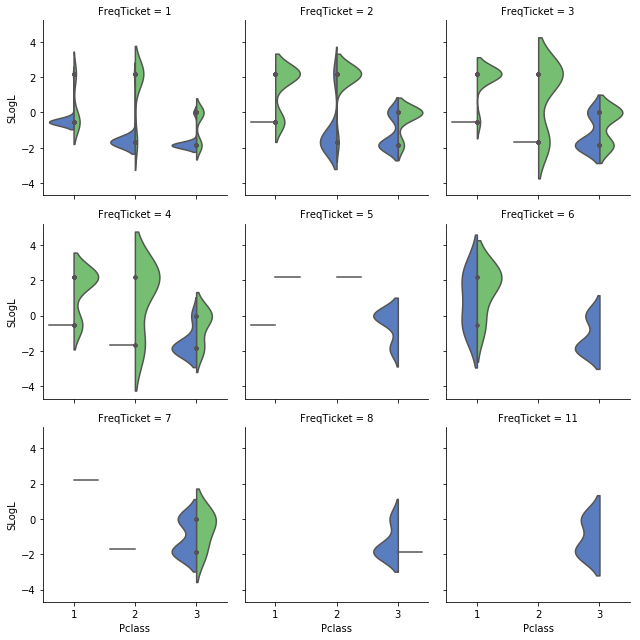

In [25]:
slogl_plot(df_full.iloc[:df_train.shape[0]]);

In [26]:
# Reward for groups with survivors
survivor_group_reward = 3

def reward(survived):
    '''Compute reward from survived statistics.'''
    group_nan = survived.isnull().sum()
    group_size = survived.shape[0]
    group_sum = np.sum(survived)

    if (group_nan > 0 and group_size > 1 and group_sum > 0):
        return survivor_group_reward
    else:
        return 0

# Rewards per ticket group
rewards = df_full.groupby('Ticket')['Survived'].apply(reward).to_frame()
rewards.columns = ['Reward']

# Apply rewards to SLogL
df_full.SLogL = df_full.SLogL + df_full.merge(rewards, left_on='Ticket', right_index=True, how='left').Reward 

In [27]:
single_penalty = -2.1

# Apply penalty to SLogL
df_full.loc[df_full.GID == 'single', 'SLogL'] = \
df_full.loc[df_full.GID == 'single', 'SLogL'] - single_penalty

In [28]:
# Penalties for large ticket groups
penalty_7 = 3
penalty_8 = 1
penalty_11 = 3

# Apply penalties to SLogL
for group_size, penalty in zip([7, 8, 11], [penalty_7, penalty_8, penalty_11]):
    df_full.loc[df_full.FreqTicket == group_size, 'SLogL'] = \
    df_full.loc[df_full.FreqTicket == group_size, 'SLogL'].map(lambda x: x - penalty)

In [29]:
minor_slogl = 8

# Set minor SLogL value
df_full.loc[df_full.Minor == True, 'SLogL'] = minor_slogl

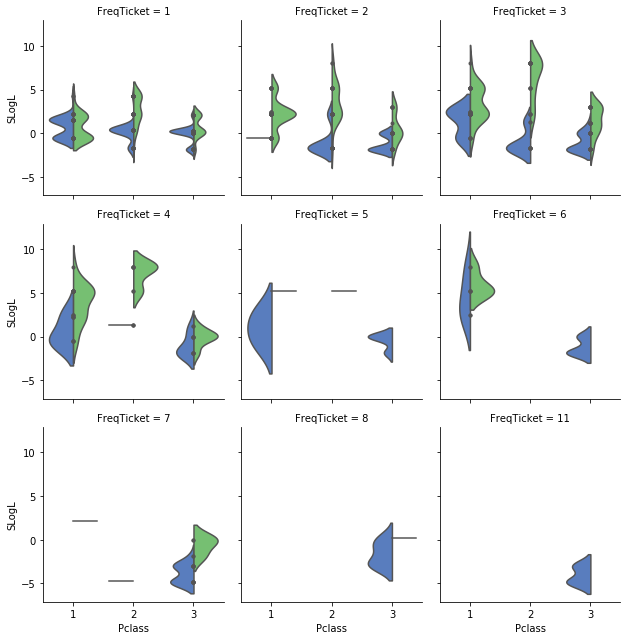

In [30]:
slogl_plot(df_full.iloc[:df_train.shape[0]]);



In [31]:
df_train = df_full.iloc[:df_train.shape[0]]
df_test = df_full.iloc[df_train.shape[0]:]

X_train = df_train.SLogL.values.reshape(-1,1)
X_test = df_test.SLogL.values.reshape(-1,1)

y_train = df_target

In [32]:
df_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Minor,Surname,FamSize,FreqTicket,FreqCabin,FreqFare,GID,SLogL
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,NaN,Braund,1,1,NaN,18,Braund1,-1.853635
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,False,Cumings,1,2,2.0,2,Cumings1,5.197225
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,NaN,Heikkinen,0,1,NaN,23,single,2.100000
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,False,Futrelle,1,2,2.0,6,Futrelle1,2.197225
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,NaN,Allen,0,1,NaN,60,single,0.246365
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,NaN,Moran,0,1,NaN,1,single,0.246365
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,False,McCarthy,0,2,2.0,4,17463,-0.537143
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,NaN,Palsson,4,5,NaN,5,Palsson4,-1.853635
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,NaN,Johnson,2,3,NaN,3,Johnson2,0.000000
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,False,Nasser,1,2,NaN,2,Nasser1,2.197225


In [33]:
num_folds = 7
num_repeats = 5

# Use a stratified k-fold for generating train-test splits
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Use a random forest classifier as second-level estimator
clf = RandomForestClassifier(random_state=0)

acc_scores = []
f1_scores = []

for i in range(num_repeats):
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_cv = X_train[train_idx]
        X_test_cv = X_train[test_idx]

        y_train_cv = y_train[train_idx]
        y_test_cv = y_train[test_idx]

        
        clf.fit(X_train_cv, y_train_cv)
        y_pred_cv = clf.predict(X_test_cv)

        acc_scores.append(accuracy_score(y_test_cv, y_pred_cv))
        f1_scores.append(f1_score(y_test_cv, y_pred_cv))
    
acc_scores_mean = np.mean(acc_scores)
acc_scores_std = np.std(acc_scores)

f1_scores_mean = np.mean(f1_scores)
f1_scores_std = np.std(f1_scores)

print(f'CV summary for {num_repeats} repeats on {skf.n_splits} splits:')
print(f'accuracy score: {acc_scores_mean:.3f} +/- {acc_scores_std:.3f}')
print(f'f1 score:       {f1_scores_mean:.3f} +/- {f1_scores_std:.3f}')

CV summary for 5 repeats on 7 splits:
accuracy score: 0.825 +/- 0.023
f1 score:       0.737 +/- 0.043


In [34]:
clf = RandomForestClassifier(n_estimators=1000,oob_score=True,random_state=0)
clf.fit(X_train, y_train)
print (clf.oob_score_)
# Write the prediction results to submission.csv in the current working directory
submission = pd.DataFrame({ 'PassengerId': df_test['PassengerId'], 'Survived': clf.predict(X_test) })
submission.to_csv("submission.csv", index=False)

0.83164983165
